<a href="https://colab.research.google.com/github/mpedraza98/DSPS_MPedraza/blob/main/HW4/HW4_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [335]:
import pandas as pd
import numpy as np
import pylab as plt
%pylab inline


#package I will use for constants and units conversion 
import astropy
from astropy import units as u


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

F = (G*M*m)/r^2 = m * a
From here, you can cancel the m's and substitute v^2/r for a:

(G*M)/r^2 = v^2/r

--->> v^2 = (G*M)/r



## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [336]:
# your code here
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv",sep=",",skiprows=2,names=["r","v","dv","err"])

In [337]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [338]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [339]:
apparentSizeM31 = 3.167 #deg
distanceM31 = (752) #kpc 


In [340]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.5f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05527 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [341]:
# your code here
#From the site that Wikipedia got it's distance info: (Both distance and uncertainty in kpc)
distanceM31 = 752
m31dist_uncert = 27
print("Distance to Andromeda: {:.0f}".format(distanceM31)+ " kpc +- {:.0f}".format(m31dist_uncert)+" kpc")

Distance to Andromeda: 752 kpc +- 27 kpc


In [342]:
#Convert apparent size from degrees to radians
apparentSizeM31 = apparentSizeM31* np.pi/180
m31_vis = distanceM31 * np.sin(apparentSizeM31)
m31_vis_uncert = m31dist_uncert * np.sin(apparentSizeM31)

In [343]:
# your code here
print("Size of the visible component of Andromeda: {:2.1f}".format(m31_vis)+" kpc +- {:1.1f}".format(m31_vis_uncert)+" kpc" ) 

Size of the visible component of Andromeda: 41.5 kpc +- 1.5 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [344]:
def getradii(gal, gsize, n):
  min_r = n * (gsize/2)  #divide by 2 to get from galaxy diameter to radius
  i = np.min(np.where(gal.r>=min_r))
  return gal.r[i], gal.v[i], gal.dv[i], gal.err[i], i



### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [345]:
dat =[]
x = []
for i in range(0,3):
  m31r = getradii(m31,m31_vis,i+1)
  dat.append(m31r[4])
  

In [346]:
def plotGal(gal, galname, gsize):
  fig = plt.figure(figsize = (10,7))
  ax = plt.axes()
  rad = gal.r
  v = gal.v
  dat =[]
  x = []
  y = []
  colors = ['red','orange','green']
  nvals = ['n=1','n=2','n=3']
  for i in range(0,3):
    m31r = getradii(gal,gsize,i+1)
    dat.append(m31r[4])
    x.append(rad[dat[i]])
    y.append(v[dat[i]])
    plt.scatter(x[i],y[i],c=colors[i],s=60,label=nvals[i])
  print(m31r[4],dat[2],i)
  plt.plot(rad[0:m31r[4]+1],v[0:m31r[4]+1])
  plt.errorbar(rad[0:m31r[4]+1],v[0:m31r[4]+1],yerr=gal.err[0:m31r[4]+1],ecolor='blue',elinewidth=2,label="err")
  plt.errorbar(rad[0:m31r[4]+1],v[0:m31r[4]+1],yerr=gal.dv[0:m31r[4]+1],ecolor='blue',elinewidth=0.5,label="dv")

  for i in range(3):
    roundv = round(v[dat[i]],1)
    rounderr = round(m31.err[dat[i]],1)
    rounddv = round(m31.dv[dat[i]],1)
    label = "       " + str(roundv) + "\n (" + str(rounderr) + " -- " + str(rounddv) + ")"
    plt.text(rad[dat[i]]-3,v[dat[i]]-gal.dv[dat[i]]-13,label)


  plt.title(galname + ' Rotational Curve')
  plt.xlabel('Radius (kpc)')
  plt.ylabel('Velocity (km/s)')
  plt.legend()

36 36 2


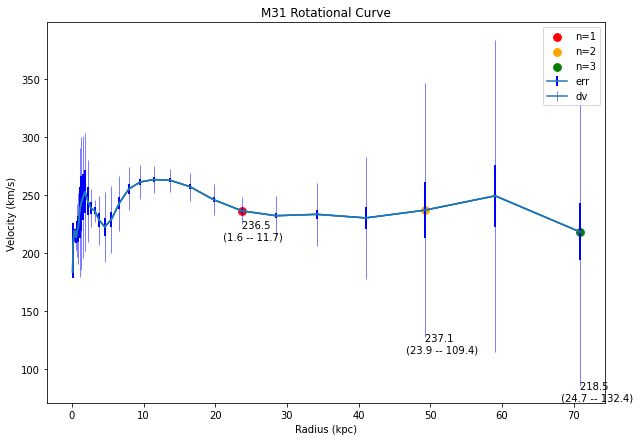

In [347]:
plotGal(m31, 'M31', m31_vis)

Figure 1: This figure shows the velocity as a function of galaxy radius. We find that as radius increases, the velocity doesn't necessarily increase, but the uncertainties associated with the velocity increase substantially.

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [348]:
def vratios(gal, g_size, N, err = 'dv'):
  # We find the radius at least as large as the one needed and the radius for N = 1
  radii = getradii(gal, g_size, N)
  radii_1 = getradii(gal, g_size, 1)

  # Calculate the ratios for velocities and radii
  # The ratio for the radius has the inverse order since
  # v1/v2=r2/r1
  v_ratio = (radii_1[1] / radii[1])**2
  r_ratio = radii[0] / radii_1[0]

  i = 2
  if not err == 'dv':
    i = 3

  # The uncertainty for the v ratio is calculated using the error propagation
  dv_ratio = np.sqrt((2*radii[i] / radii[1])**2+(2*radii_1[i] / radii_1[1])**2)*np.abs(v_ratio)
  
  print("For a radius {} times greater than the visible radius \n".format(N) +
  "- the expected ratio based on the radii, {:.3f} \n".format(r_ratio)+
   "- Using {}, we got a ratio of, {:.3f} +/- {:.3f}\n".format(err, v_ratio, dv_ratio)+
   "- The 2-sigma upper and lower limits of the calculated ratio are ({:.3f} , {:.3f})\n".format(v_ratio + dv_ratio, v_ratio - dv_ratio)+
   "- Therefore the expected ratio {result} within the 2-\sigma of the calculated ratio. ".format(result = "is" if (r_ratio >= v_ratio - dv_ratio) and (r_ratio <= v_ratio + dv_ratio) else "is not"))

Once defined the function, let's calculate the ratios of the velocities for different values of N and different errors associated
 

In [349]:
vratios(m31,m31_vis,2)
print("\n")
vratios(m31,m31_vis,3)

For a radius 2 times greater than the visible radius 
- the expected ratio based on the radii, 2.074 
- Using dv, we got a ratio of, 0.995 +/- 0.924
- The 2-sigma upper and lower limits of the calculated ratio are (1.919 , 0.072)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


For a radius 3 times greater than the visible radius 
- the expected ratio based on the radii, 2.986 
- Using dv, we got a ratio of, 1.172 +/- 1.424
- The 2-sigma upper and lower limits of the calculated ratio are (2.596 , -0.253)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


In this case, when using only 'div' error we found that the expected ratios within the range of the calculated ones. It makes sense considering that 'div' error is considerably larger than 'err' and it doesn't take into account all factors that 'err' does.

Based on these results we could argue that measured velocities agree at a 2-$\sigma$ degree with the newtonian prediction.

Now, let's consider the analysis with 'err' as the error

In [350]:
vratios(m31, m31_vis, 2, 'err')
print("\n")
vratios(m31, m31_vis, 3, 'err')

For a radius 2 times greater than the visible radius 
- the expected ratio based on the radii, 2.074 
- Using err, we got a ratio of, 0.995 +/- 0.201
- The 2-sigma upper and lower limits of the calculated ratio are (1.197 , 0.794)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


For a radius 3 times greater than the visible radius 
- the expected ratio based on the radii, 2.986 
- Using err, we got a ratio of, 1.172 +/- 0.265
- The 2-sigma upper and lower limits of the calculated ratio are (1.437 , 0.907)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


For this case we got some very interesting results. When $N = 2$ the Newtonian predictions and aour data are in agreement, however for $N = 3$ they no longer coincide.

The error 'err' takes into account more factors than 'div' did. Therefore, it seems logical that its results are more accurate. When we look at the upper limit for the result in agreement, the newtonian prediction is very close tho this limit.

However, this analysis doesn't allow us to make any statement about the velocities. Since we already know the result, we could argue that this analysis tends to point towards a conclusion that newtonian gravity doesn't work properly on the object of our study

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [351]:
# your code here
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv", sep=",", skiprows = 2, names = ["r","v","dv","err"])

In [352]:
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


As reported in SOFUE 2015, we are going to use $R_0 = 8 $ kpc and $V_0 = 238 $ km s$^{-1}$ 

In [353]:
# Multiplied by 2 because the function rmin takes the diameter
r0 = 8*2
V0 = 238

Let's calculate the ratios of the velocities for different values of N and different errors associated

In [354]:
vratios(mw,r0,2)
print("\n")
vratios(mw,r0,3)

For a radius 2 times greater than the visible radius 
- the expected ratio based on the radii, 2.073 
- Using dv, we got a ratio of, 0.880 +/- 0.372
- The 2-sigma upper and lower limits of the calculated ratio are (1.252 , 0.508)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


For a radius 3 times greater than the visible radius 
- the expected ratio based on the radii, 2.986 
- Using dv, we got a ratio of, 0.877 +/- 0.483
- The 2-sigma upper and lower limits of the calculated ratio are (1.359 , 0.394)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


In [355]:
vratios(mw, r0, 2, 'err')
print("\n")
vratios(mw, r0, 3, 'err')

For a radius 2 times greater than the visible radius 
- the expected ratio based on the radii, 2.073 
- Using err, we got a ratio of, 0.880 +/- 0.044
- The 2-sigma upper and lower limits of the calculated ratio are (0.924 , 0.836)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


For a radius 3 times greater than the visible radius 
- the expected ratio based on the radii, 2.986 
- Using err, we got a ratio of, 0.877 +/- 0.101
- The 2-sigma upper and lower limits of the calculated ratio are (0.978 , 0.775)
- Therefore the expected ratio is not within the 2-\sigma of the calculated ratio. 


43 43 2


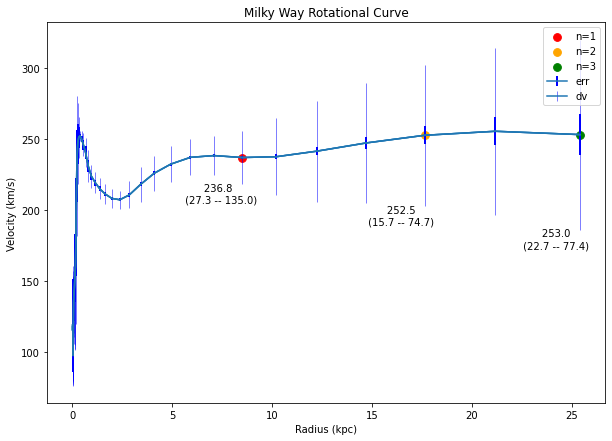

In [356]:
plotGal(mw, 'Milky Way', r0)

Figure 2: This figure shows a steeper increase in velocity towards the center of the galaxy than figure 1. Similar to figure 1, however, the uncertainty as you move farther and farther from the center of the galaxy increases substantially.